In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(10,7)})

##### Things to do:

1. Exploratory Data Analysis 
2. Pre-processing
3. Feature engineering 
4. Model evaluation
    - Split train dataset into train and validation 
    - Compare different models - RF, Regression (LASSO/Ridge Regression), Gradient Boosted Trees
    - Metrics (RMSE), Variable importance (for explanation)
    - LIME (Local Interpretability Model Agnostic)
5. Report / Slide Deck

In [23]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

In [3]:
train.shape

(431732, 17)

In [4]:
test

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,2004-01,bukit batok,4 room,186,bukit batok west avenue 6,04 to 06,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region
1,2001-11,tampines,5 room,366,tampines street 34,04 to 06,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region
2,2002-07,jurong east,3 room,206,jurong east street 21,01 to 03,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region
3,2015-04,ang mo kio,3 room,180,Ang Mo Kio Avenue 5,04 to 06,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region
4,2004-04,clementi,5 room,356,clementi avenue 2,01 to 03,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04,hougang,5 room,981D,buangkok crescent,10 to 12,110.0,improved,uncategorized,2003,1.380452,103.879333,0.0,trafalgar,hougang,north-east region
107930,2006-01,kallang/whampoa,4 room,13,upper boon keng road,13 to 15,102.0,model a,uncategorized,1999,1.314481,103.870458,0.0,boon keng,kallang,central region
107931,2000-01,kallang/whampoa,3 room,1,beach road,07 to 09,68.0,improved,uncategorized,1979,1.294924,103.854315,0.0,city hall,downtown core,central region
107932,2009-07,jurong west,4 room,919,jurong west street 91,10 to 12,104.0,model a,uncategorized,1988,1.339927,103.687354,0.0,yunnan,jurong west,west region


In [5]:
train.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
285001,2006-08,choa chu kang,5 room,223,Choa Chu Kang Central,01 to 03,122.0,improved,uncategorized,1993,1.381484,103.744533,0.0,choa chu kang central,choa chu kang,west region,232200.0
355078,2018-09,bukit merah,3 room,16,telok blangah crescent,10 to 12,65.0,improved,uncategorized,1975,1.278054,103.821505,0.0,telok blangah way,bukit merah,central region,247500.0
324505,2014-01,marine parade,3-room,30,marine crescent,13 to 15,76.0,improved,uncategorized,1975,1.304223,103.911164,0.0,marine parade,marine parade,central region,423000.0
365616,2006-05,bishan,4 room,506,Bishan Street 11,04 to 06,103.0,model a,uncategorized,1989,1.349172,103.849165,0.0,bishan east,bishan,central region,313200.0
42706,2005-12,bukit batok,3 room,274,Bukit Batok East Avenue 4,04 to 06,64.0,simplified,uncategorized,1988,1.347952,103.757963,0.0,bukit batok east,bukit batok,west region,126270.0


In [6]:
train['year'] = train.month.str[:4].astype('int')
train['price_per_area'] = train['resale_price']/train['floor_area_sqm']
train['lease_duration'] = train['year']-train['lease_commence_date']

In [7]:
train.eco_category.value_counts() # all uncategorized, can drop!

uncategorized    431732
Name: eco_category, dtype: int64

In [8]:
train.isna().sum() # great, no NA values

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
eco_category           0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
resale_price           0
year                   0
price_per_area         0
lease_duration         0
dtype: int64

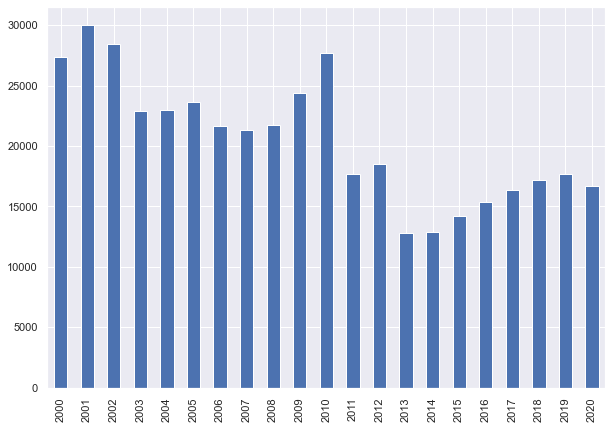

In [9]:
# volume of transactions is lower after 2010 
train.year.value_counts().sort_index().plot(kind='bar')
plt.show()

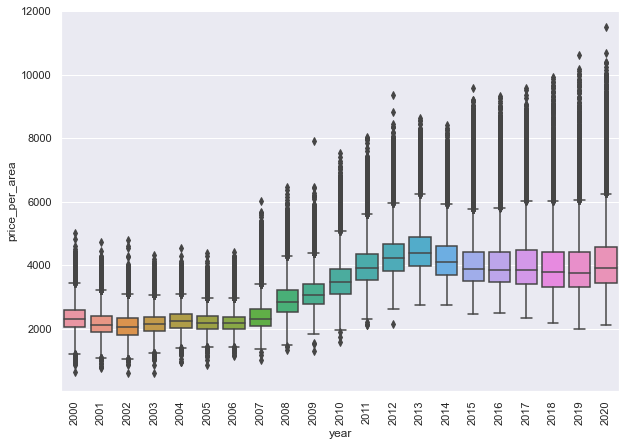

In [10]:
p = sns.boxplot(x='year',y='price_per_area', data=train)
plt.xticks(rotation=90)
plt.show()

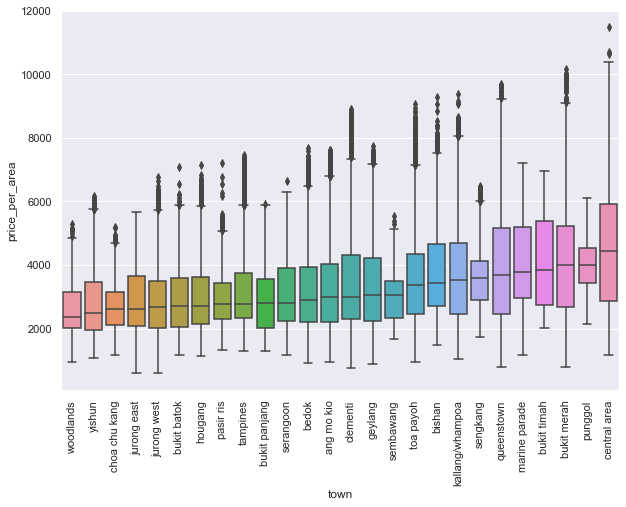

In [11]:
order = train.groupby('town').price_per_area.agg('median').sort_values().index
p = sns.boxplot(x='town',y='price_per_area', data=train, order=order)
plt.xticks(rotation=90)
plt.show()

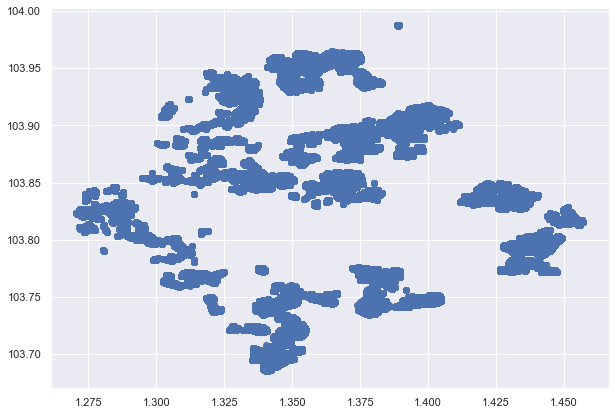

In [12]:
# no clear relationship 
plt.scatter(x=train['latitude'],y=train['longitude'])
plt.show()

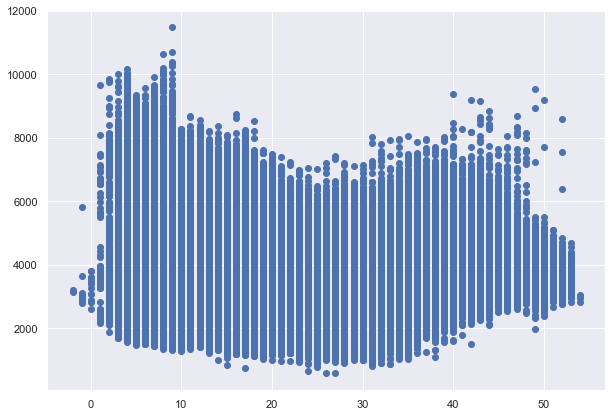

In [13]:
# no clear relationship 
plt.scatter(x=train['lease_duration'],y=train['price_per_area'])
plt.show()

In [14]:
train[['lease_duration', 'price_per_area']].corr(method='pearson')

,lease_duration,price_per_area
lease_duration,1.000000,0.212324
price_per_area,0.212324,1.000000


Explore
* random idea get pri school 

drop
* eco_cat
* lease comm (making our own feature)
* elevation
* block
* streetname

In [15]:
train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,year,price_per_area,lease_duration
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0,2001,1777.118644,12
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0,2014,3657.272727,11
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0,2020,3133.928571,16
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0,2000,2256.716418,20
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0,2013,4364.383562,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2005-03,woodlands,4 room,537,Woodlands Drive 16,01 to 03,101.0,model a,uncategorized,2000,1.429658,103.792583,0.0,woodlands south,woodlands,north region,238500.0,2005,2361.386139,5
431728,2016-04,sengkang,4 room,410A,fernvale road,13 to 15,95.0,premium apartment,uncategorized,2012,1.390053,103.875941,0.0,fernvale,sengkang,north-east region,376200.0,2016,3960.000000,4
431729,2011-01,tampines,3-room,829,tampines street 81,01 to 03,67.0,new generation,uncategorized,1986,1.349224,103.934913,0.0,tampines west,tampines,east region,255600.0,2011,3814.925373,25
431730,2013-05,sengkang,5-room,233,compassvale walk,16 to 18,123.0,improved,uncategorized,1999,1.389941,103.900721,0.0,sengkang town centre,sengkang,north-east region,508500.0,2013,4134.146341,14


In [16]:
prisch = pd.read_csv("../data/raw/sg-secondary-schools.csv")

In [17]:
prisch

,name,lat,lng
0,Admiralty Secondary School,1.445912,103.802908
1,Ahmad Ibrahim Secondary School,1.436095,103.830055
2,Anderson Secondary School,1.375417,103.851723
3,Anglican High School,1.330218,103.941759
4,Anglo-Chinese School (Barker Road),1.319709,103.835661
...,...,...,...
145,Yuhua Secondary School,1.346888,103.722425
146,Yusof Ishak Secondary School,1.407173,103.896633
147,Yuying Secondary School,1.357094,103.890709
148,Zhenghua Secondary School,1.388841,103.765207


In [18]:
# get seconday school PSLE cut-off - use it as a weight?

# mrt need to check if transcated date got the mrt nearby

# not sure if population demographics is useful -- abit excessive

# modelling the "economic climate" could be important too, 2 similar houses may not 


In [19]:
dfmrt = pd.read_csv("../data/raw/sg-train-stations.csv")

In [20]:
dfmrt[dfmrt['name'] == 'Serangoon']

,name,codes,lat,lng,opening_year,type
128,Serangoon,CC13/NE12,1.350151,103.872971,2003.0,mrt


# Feature Engineering pipeline



In [24]:
train['year'] = train.month.str[:4].astype('int')
train['price_per_area'] = train['resale_price']/train['floor_area_sqm']
train['lease_duration'] = train['year']-train['lease_commence_date']
train['storey'] = (train.storey_range.str[-2:].astype('int') + train.storey_range.str[:2].astype('int'))/2
train['flat_type'] = train['flat_type'].str.replace('-', ' ') # there are some flat_type encoded as 4-room and 4 room

# flat_type as ordinal variables (either this or the one after)
train.flat_type_ord = train.flat_type.map({
    '1_room':1,
    '2_room':2,
    '3_room':3,
    '4_room':4,
    '5_room':5,
    'executive':6,
    'multi_generation': 7
})

# flat_type as categorical variable (either this or the one before)
train = pd.get_dummies(train, columns=["flat_type"], drop_first=False)
train.drop(columns = 'flat_type_multi generation') # dropping this since it is the least frequent among all flat types



train.drop(columns = ['elevation', 'eco_category'], inplace=True) # confirm drop
train.drop(columns = ['storey_range', 'block', 'street_name', 'subzone', 'planning_area', 'lease_commence_date'], inplace=True) # to discuss

/Users/sylvesterchin/.pyenv/versions/3.6.10/envs/p3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


In [26]:
pop = pd.read_csv("../data/raw/sg-population-demographics.csv") # calculate median age


In [27]:
pop['age']

,plannin_area,subzone,age_group,sex,count
0,ang mo kio,ang mo kio town centre,0-4,m,130
1,ang mo kio,cheng san,0-4,m,670
2,ang mo kio,chong boon,0-4,m,460
3,ang mo kio,kebun bahru,0-4,m,380
4,ang mo kio,sembawang hills,0-4,m,90
...,...,...,...,...,...
7831,yishun,springleaf,85+,f,30
7832,yishun,yishun central,85+,f,10
7833,yishun,yishun east,85+,f,160
7834,yishun,yishun south,85+,f,240
